In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
import statsmodels.api as sm

In [9]:
#define the model
X = sm.add_constant(x)
model = sm.OLS(y,X)

C:\Users\avina\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
result = model.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          6.72e-135
Time:                        12:53:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [12]:
# 1st assumptio 
# there has to be linear relation betweent the target varible and depedent varible

## checking 1ast Assumption _linear relation

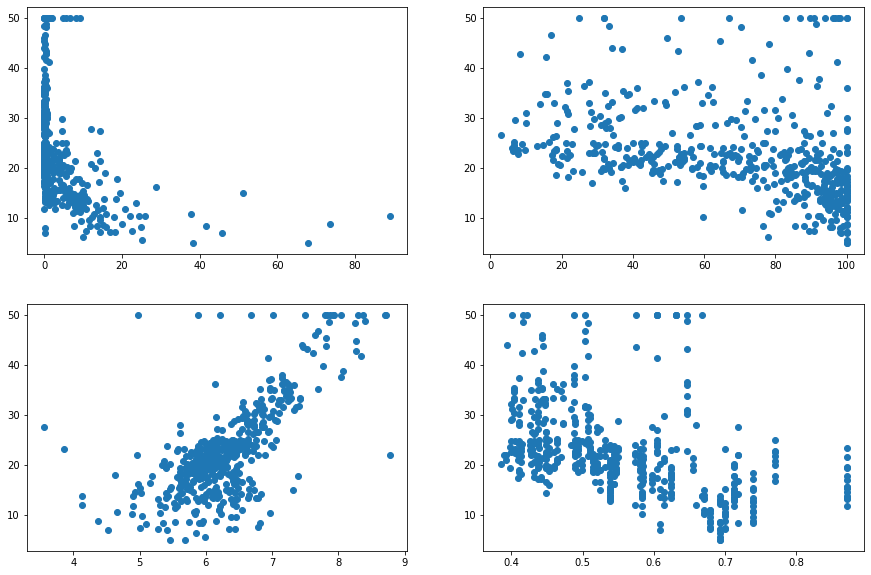

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(15,10)
fig,((ax1, ax2),(ax3,ax4))= plt.subplots(2,2)
ax1.scatter(X['crim'],y)
ax2.scatter(X['age'],y)
ax3.scatter(X['rm'],y)
ax4.scatter(X['nox'],y)
plt.show()


if columns has large coeficent so it's showing linearity

as we can see in "rm" columns is showing little bit linearity

# checking 2nd assumption - NO or little Multicollinearity

multicollinearity : existance of high correlation between independent feature

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor# checking #VIF
{X.columns[i]: variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'crim': 1.7921915474332406,
 'zn': 2.2987581787494418,
 'indus': 3.9915964183460315,
 'chas': 1.0739953275537883,
 'nox': 4.393719847577493,
 'rm': 1.933744435783257,
 'age': 3.1008255128153372,
 'dis': 3.9559449063727263,
 'rad': 7.484496335274472,
 'tax': 9.00855394759707,
 'ptratio': 1.7990840492488978,
 'b': 1.3485210764063753,
 'lstat': 2.9414910780919348}

 we are taking thresh hold of vif is 5 
any varible which have vif more thresh hold then that we are taking out for the analysis

## checking 3rd Assumptions - Homoscedasticity - constant variance

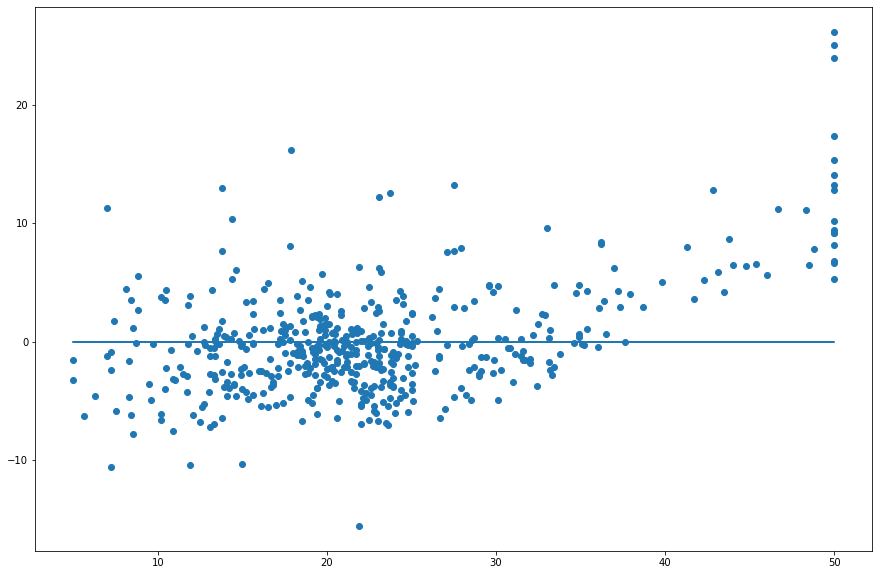

In [25]:
residuals = result.resid
plt.scatter(y, residuals)
plt.plot(y,[0]*len(y))

## checking 3rd Assumptions - No autocorrelation of errors

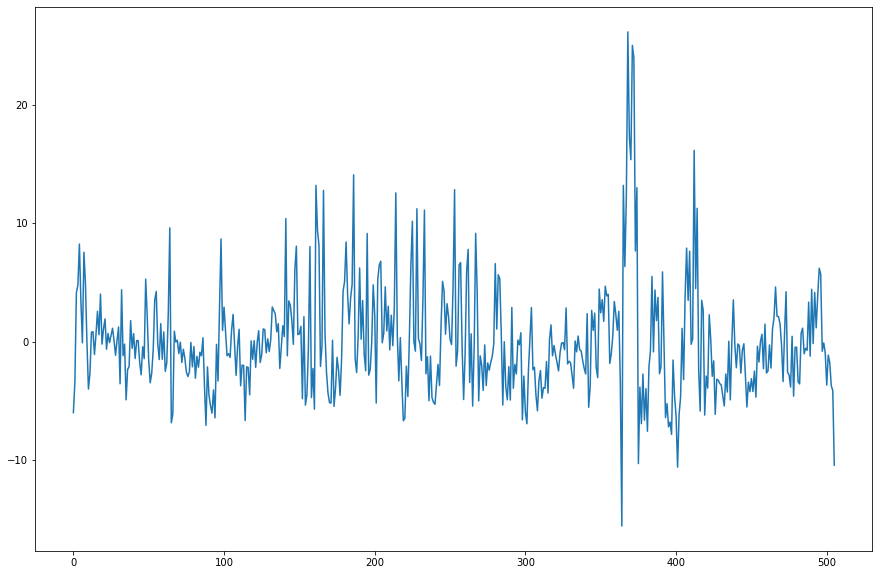

In [26]:
plt.plot(residuals.index, residuals)

if you see any patten in chart it's mean your errors terms are correlated

## checking 3rd Assumptions - Residual should be normal

there are many way to see residual is normaly distributed or not

### QQPLOT

C:\Users\avina\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


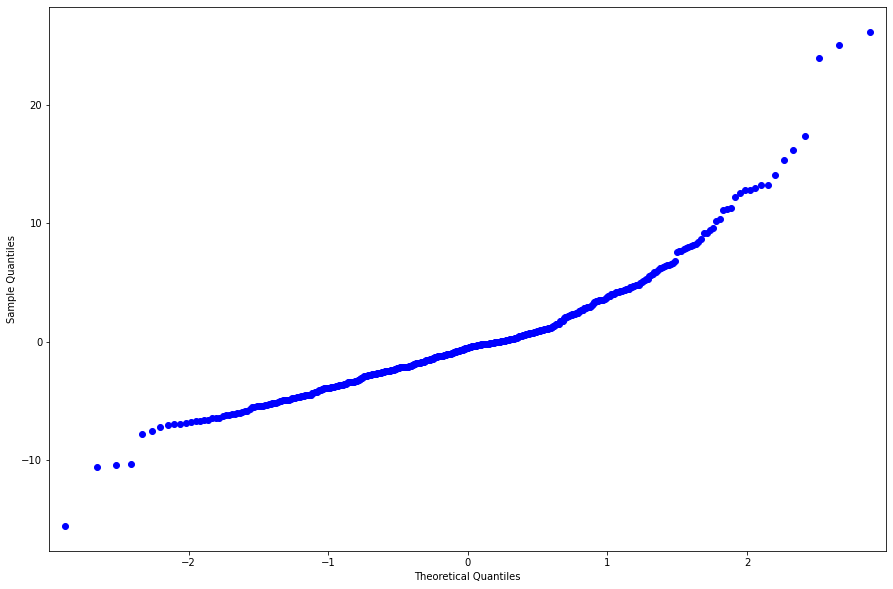

In [28]:
residuals = result.resid
sm.qqplot(residuals)
plt.show()

### HISTOGRAM

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

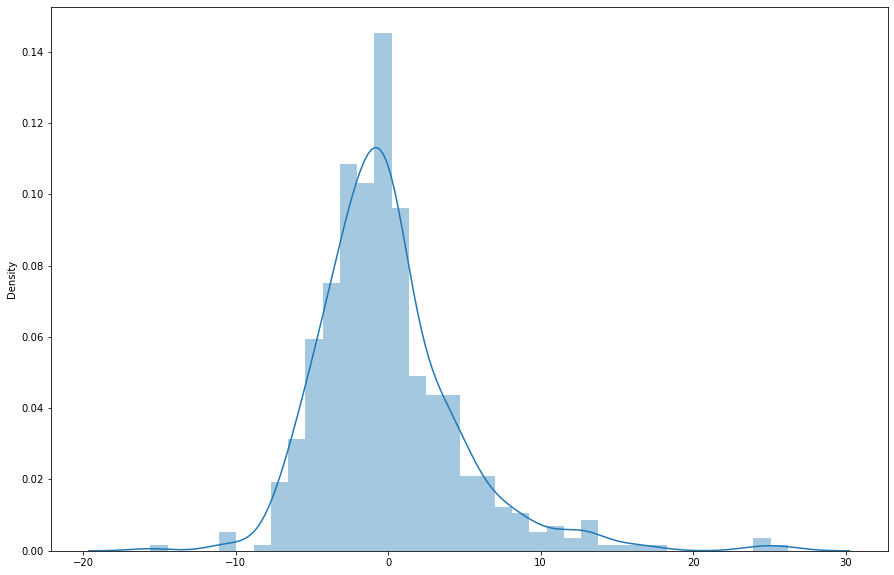

In [31]:
sns.distplot(residuals)

if residual is normaly distributed show mean of residual will be near to Zero

In [32]:
np.mean(residuals)

-1.899227371769833e-15

## Checking 6th Assumption - Independence of observation 
there is not the direct way to check show looking at the data ways to collect etc

## Checking 6th Assumption - Residual relation with independent vatiables

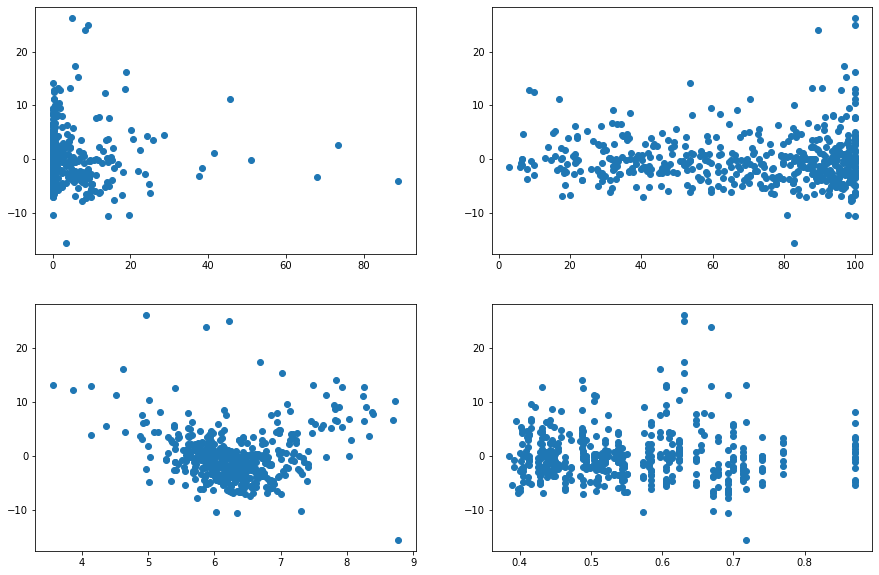

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(15,10)
fig,((ax1, ax2),(ax3,ax4))= plt.subplots(2,2)
ax1.scatter(X['crim'],residuals)
ax2.scatter(X['age'],residuals)
ax3.scatter(X['rm'],residuals)
ax4.scatter(X['nox'],residuals)
plt.show()


In [ ]:
residual should not show any relation with independent data